<a href="https://colab.research.google.com/github/uruba24/Python/blob/main/EDA_Assignment_DS8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Step-1: import the given file using appropriate pandas function, store it in a dataframe and read the first 3 rows.


'''IMP: There are 2 sheets in the given file i.e. App Store Games and Data Dictionary.
      Load App Store Games sheet for analysis. Pass the sheet name as an argument(sheet_name) to the function(read_excel).
      '''
file_path = '/content/App Store Games English.xlsx'
df = pd.read_excel(file_path, sheet_name='App Store Games')
df.head(3)

,App URL,App ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-07-11
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-07-11
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-07-11


In [5]:
# Step-2: Check the shape of the dataset
df.shape

(17007, 16)

In [6]:
# Step-3: Check the datatype of all the columns
df.dtypes


,0
App URL,object
App ID,int64
Name,object
Subtitle,object
Icon URL,object
Average User Rating,float64
User Rating Count,float64
Price per App (USD),float64
Description,object
Developer,object


In [7]:
# Step-4: Check the total no. of duplicate rows, remove them and also reset the index.
duplicates_count = df.duplicated().sum()
print(f"Total number of duplicates: {duplicates_count}")

df = df.drop_duplicates()
df = df.reset_index(drop=True)
print("Duplicates Removed")


Total number of duplicates: 160
Duplicates Removed


In [8]:
# Step-5: Check the no. of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


App URL                    0
App ID                     0
Name                       1
Subtitle               11638
Icon URL                   0
Average User Rating     9359
User Rating Count       9359
Price per App (USD)        0
Description               17
Developer                  0
Age Rating                 0
Languages                  0
Size in Bytes              1
Primary Genre              0
Genres                     0
Release Date               0
dtype: int64


In [9]:
# Step-6: Impute the missing values and explain your strategy for each column
# filling missing values with 'Unknown'
df['Name'] = df['Name'].fillna('Unknown')
df['Subtitle'] = df['Subtitle'].fillna('Unknown')

#filling missing values with No 'Description'
df['Description'] = df["Description"].fillna('No Description')

# filling missing values with mean for 'Average User Rating' and  'User Rating Count'
df['Average User Rating'] = df['Average User Rating'].fillna(df['Average User Rating'].mean())  # Impute with mean
df['User Rating Count'] = df['User Rating Count'].fillna(df['User Rating Count'].mean())  # Impute with mean

#filling missing values for 'Size in Bytes' with the median
df['Size in Bytes'] = df['Size in Bytes'].fillna(df['Size in Bytes'].median())

df.head(10)

,App URL,App ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,Unknown,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-07-11
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,Unknown,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-07-11
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,Unknown,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-07-11
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),Unknown,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,Unknown,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",2008-07-30
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,Unknown,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,"""Gravitation is a new implementation of the pu...",Robert Farnum,4+,EN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy",2008-07-30
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,Unknown,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,64333824.0,Games,"Games, Strategy, Board",2008-08-03
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,Unknown,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,"""Jeu simple qui consiste \xe0 trouver comment ...",Jean-Francois Pautex,4+,FR,2657280.0,Games,"Games, Strategy, Board, Entertainment",2008-08-03
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",Unknown,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,Barrels O\u2019 Fun is a simple but challengin...,BesqWare,4+,EN,1466515.0,Games,"Games, Casual, Strategy",2008-08-01


In [10]:
# Step-7: Sort the DataFrame by 'Size in Bytes' column in decending order

df_sorted = df.sort_values(by='Size in Bytes', ascending=False)
print("\nDataFrame sorted by 'Size in Bytes' column in descending order:")
print(df_sorted)


DataFrame sorted by 'Size in Bytes' column in descending order:
                                                 App URL      App ID  \
11849  https://apps.apple.com/us/app/rome-total-war-a...  1245565445   
8313   https://apps.apple.com/us/app/rome-total-war/i...  1106831630   
2128   https://apps.apple.com/us/app/baldurs-gate-ii-...   633625517   
11618  https://apps.apple.com/us/app/sid-meiers-civil...  1235863443   
10367  https://apps.apple.com/us/app/rome-total-war-b...  1183898700   
...                                                  ...         ...   
1081   https://apps.apple.com/us/app/tic-tac-toe/id49...   495029838   
593    https://apps.apple.com/us/app/dyson-telescope-...   419584432   
702    https://apps.apple.com/us/app/ching-chang-chon...   438044811   
226    https://apps.apple.com/us/app/solve-my-sudoku-...   347990652   
423    https://apps.apple.com/us/app/tic-tac-toe/id39...   394633422   

                                    Name                       Subtitl

In [11]:
# Step-8: Create 3 new columns
# 1. 'Year' - > by extracting year from Release Date column
# HINT: df['Release Date'].dt.year

df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Year'] = df['Release Date'].dt.year
print(df[['Release Date', 'Year']].head())


  Release Date  Year
0   2008-07-11  2008
1   2008-07-11  2008
2   2008-07-11  2008
3   2008-07-23  2008
4   2008-07-18  2008


In [12]:
# 2. 'Paid or Free' -> using lambda function on 'Price per App (USD)' where price = 0 assign'Free' else 'Paid'.

df['Paid or Free'] = df['Price per App (USD)'].apply(lambda x: 'Free' if x == 0 else 'Paid')
print(df[['Price per App (USD)', 'Paid or Free']].head())

   Price per App (USD) Paid or Free
0                 2.99         Paid
1                 1.99         Paid
2                 0.00         Free
3                 0.00         Free
4                 2.99         Paid


In [13]:
# 3. 'Revenue' -> 'User Rating Count' * 'Price per App (USD)'

df['Revenue'] = df['User Rating Count'] * df['Price per App (USD)']
print(df[['User Rating Count', 'Price per App (USD)', 'Revenue']].head())

   User Rating Count  Price per App (USD)   Revenue
0             3553.0                 2.99  10623.47
1              284.0                 1.99    565.16
2             8376.0                 0.00      0.00
3           190394.0                 0.00      0.00
4               28.0                 2.99     83.72


In [14]:
# Step 9: Convert the values in 'Size in Bytes' column into MB
# HINT: bytes to KB - > df['Size in Bytes']/1024
#         KB to MB - > df['Size in Bytes']/1024/1024

df['Size in MB'] = df['Size in Bytes'] / (1024 * 1024)
print(df[['Size in Bytes', 'Size in MB']].head())

   Size in Bytes  Size in MB
0     15853568.0   15.119141
1     12328960.0   11.757812
2       674816.0    0.643555
3     21552128.0   20.553711
4     34689024.0   33.082031


In [15]:
# Step 10: Rename the columns to lowercase and remove spaces also change 'Size in Bytes' to 'Size (MB)'

# Rename columns to lowercase and remove spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Rename 'size_in_bytes' to 'size_(MB)'
df.rename(columns={'size_in_bytes': 'size_(MB)'}, inplace=True)
print(df.columns)


Index(['app_url', 'app_id', 'name', 'subtitle', 'icon_url',
       'average_user_rating', 'user_rating_count', 'price_per_app_(usd)',
       'description', 'developer', 'age_rating', 'languages', 'size_(MB)',
       'primary_genre', 'genres', 'release_date', 'year', 'paid_or_free',
       'revenue', 'size_in_mb'],
      dtype='object')


In [16]:
# Step 11: Creating a new column 'size_buckets' for Size Buckets using a custom function
'''HINT:
     (if size(MB) < 100)        -> 'Under 100MB'
    (if 100 <= size(MB) < 500)  -> '100 - 500MB'
    (if 500 <= size(MB) < 1024) -> '500 - 1GB'
             else               -> 'Above 1GB'
'''

# Custom function for size buckets
def size_bucket(size_mb):
    if size_mb < 10000:
        return 'Under 10GB'
    elif 10000 <= size_mb < 50000:
        return '10GB - 50GB'
    elif 50000 <= size_mb < 100000:
        return '50 - 100GB'
    elif 100000 <= size_mb < 150000:
        return '100 - 150GB'
    elif 150000 <= size_mb < 200000:
        return '150 - 200GB'
    elif 200000 <= size_mb < 250000:
        return '200 - 250GB'
    elif 250000 <= size_mb < 300000:
        return '250 - 300GB'
    elif 300000 <= size_mb < 350000:
        return '300 - 350GB'
    elif 350000 <= size_mb < 400000:
        return '350 - 400GB'
    elif 400000 <= size_mb < 450000:
        return '400 - 450GB'
    elif 450000 <= size_mb < 500000:
        return '450 - 500GB'
    elif 550000 <= size_mb < 600000:
        return '550 - 600GB'
    elif 600000 <= size_mb < 650000:
        return '600 - 650GB'
    elif 650000 <= size_mb < 700000:
        return '650 - 700GB'
    elif 700000 <= size_mb < 750000:
        return '600 - 750GB'
    elif 750000 <= size_mb < 800000:
        return '750 - 800GB'
    elif 800000 <= size_mb < 850000:
        return '800 - 850GB'
    elif 850000 <= size_mb < 900000:
        return '850 - 900GB'
    elif 900000 <= size_mb < 950000:
        return '900 - 950GB'
    elif 950000 <= size_mb < 1000000:
        return '950 - 1000GB'
    else:
        return 'Above 1000GB'

# Apply the custom function to the 'size_(MB)' column to create the 'size_buckets' column
df['size_buckets'] = df['size_(MB)'].apply(size_bucket)

print(df[['size_(MB)', 'size_buckets']].head(10))

    size_(MB)  size_buckets
0  15853568.0  Above 1000GB
1  12328960.0  Above 1000GB
2    674816.0   650 - 700GB
3  21552128.0  Above 1000GB
4  34689024.0  Above 1000GB
5  48672768.0  Above 1000GB
6   6328320.0  Above 1000GB
7  64333824.0  Above 1000GB
8   2657280.0  Above 1000GB
9   1466515.0  Above 1000GB


In [17]:
# Step 12: Check the value counts in each size bucket

size_bucket_counts = df['size_buckets'].value_counts()
print(size_bucket_counts)

size_buckets
Above 1000GB    16794
900 - 950GB         8
800 - 850GB         7
650 - 700GB         5
850 - 900GB         5
600 - 750GB         4
550 - 600GB         4
450 - 500GB         4
400 - 450GB         3
950 - 1000GB        3
200 - 250GB         2
600 - 650GB         2
350 - 400GB         2
750 - 800GB         1
50 - 100GB          1
250 - 300GB         1
300 - 350GB         1
Name: count, dtype: int64


In [18]:
# Step 13: Drop the columns not required in analysis
'''
Icon URL
Developer
App URL
Description
Languages
Genres
Release Date
Size (MB)'''

columns_to_drop = [
    'icon_url',
    'developer',
    'app_url',
    'description',
    'languages',
    'genres',
    'release_date',
    'size_(MB)'
]

# Drop the columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)
print(df.head())

      app_id           name subtitle  average_user_rating  user_rating_count  \
0  284921427         Sudoku  Unknown                  4.0             3553.0   
1  284926400        Reversi  Unknown                  3.5              284.0   
2  284946595        Morocco  Unknown                  3.0             8376.0   
3  285755462  Sudoku (Free)  Unknown                  3.5           190394.0   
4  285831220   Senet Deluxe  Unknown                  3.5               28.0   

   price_per_app_(usd) age_rating primary_genre  year paid_or_free   revenue  \
0                 2.99         4+         Games  2008         Paid  10623.47   
1                 1.99         4+         Games  2008         Paid    565.16   
2                 0.00         4+         Games  2008         Free      0.00   
3                 0.00         4+         Games  2008         Free      0.00   
4                 2.99         4+         Games  2008         Paid     83.72   

   size_in_mb  size_buckets  
0   15.1

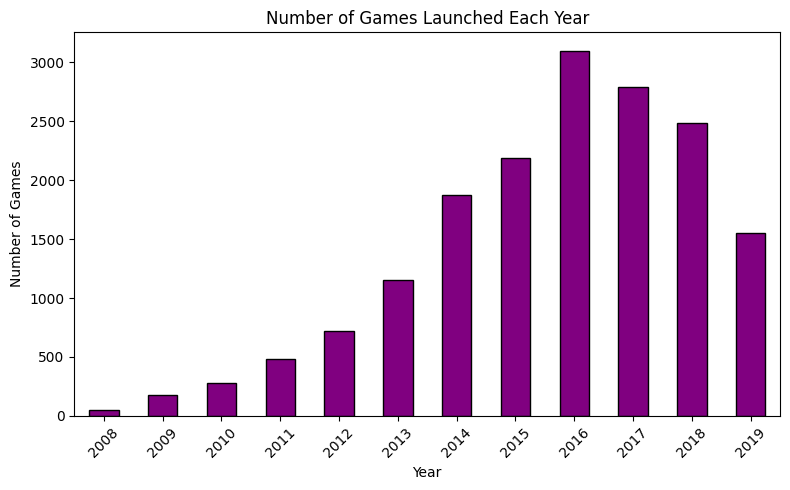

In [22]:
# Step 14: Show the no. of Games launched each year using a bar graph


# Count the number of games each year
games_per_year = df['year'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(8, 5))
games_per_year.plot(kind='bar', color='purple', edgecolor='black')

# labels and title
plt.title('Number of Games Launched Each Year', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Games', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=' ', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

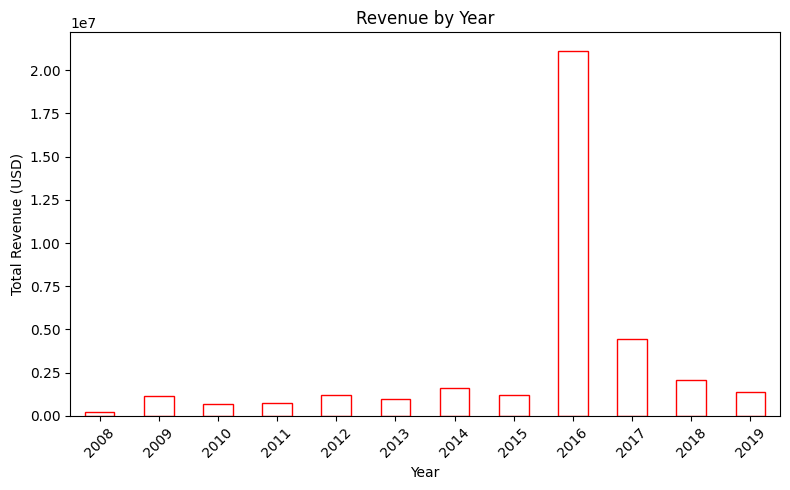

In [21]:
# Step 15: Calculate Revenue by year, save in a subset and plot using a bar graph


# Calculate revenue by year
revenue_by_year = df.groupby('year')['revenue'].sum()

# Plot the bar graph
plt.figure(figsize=(8, 5))
revenue_by_year.plot(kind='bar', color='white', edgecolor='red')

#labels and title
plt.title('Revenue by Year', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Revenue (USD)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=' ', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
# Step 16: Use the groupby function to show top 10 Games by Rating Count


top_ten_games_by_rating_count = df.groupby('name')['user_rating_count'].sum()

# Sort the values in descending order and select the top 10
top_10_games = top_ten_games_by_rating_count.sort_values(ascending=False).head(10)
print(top_10_games)

name
Clash of Clans                    3032734.0
Clash Royale                      1277095.0
PUBG MOBILE                        711409.0
Plants vs. Zombies\u2122 2         469562.0
Pok\xe9mon GO                      439776.0
Boom Beach                         400787.0
Cash, Inc. Fame & Fortune Game     374772.0
Idle Miner Tycoon: Cash Empire     283035.0
TapDefense                         273687.0
Star Wars\u2122: Commander         259030.0
Name: user_rating_count, dtype: float64
